![GMIT](GMIT-logo.png)

#  <div align="center"> Fundamentals of Data Analysis <div>
## <div align="center"> Project_2020 <div>

## Author: Shane Rylands

### G00387904@gmit.ie

***

## <u>Instructions<u>

In this project you must perform and explain simple linear regression using Python on the `powerproduction` dataset available on Moodle. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

Your submission must be in the form of a git repository containing, at a minimum, the following items:

1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to other types of regression on this data set. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.
***

### To Do

add a condition to the predict that if input is over under a value then reject

look into bayesian criteria  https://www.youtube.com/watch?v=QptI-vDle8Y

look into bias https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

Bayes information criteria 

Use scikit learn to remove outliers 

## Regression

Regression analysis is a predictive modeleing technique that estimates a relationship between an output and it's associated inputs. This relationship is then used to make predictions of outcomes based upon given inputs. With regression analysis we have a target, the value we hope to predict, and what we used to predict our target variable, the predictor. The target is referred to as the dependent as it's value is dependent upon the input variables and the values we use to predict our target variable is known as the independent as it is not influenced by the dependent. The independent is often denoted as `X` and the independent as `y`.

### <u> Linear Regression <u>
    
There are numerous types of regression each with their their own use cases. Linear regression is applicable when a linear relationship exists between the dependent and independent or that the value of `y` can be denoted as $y = m * x + c$. We shall now investigate whether our dataset is suitable for linear regression.

In [37]:
# Import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Plots will print to interface 
%matplotlib inline
# Set the plot size 
plt.rcParams['figure.figsize'] = (15, 10)

# Set the style of plotting matplotlib will use
plt.style.use('ggplot')

In [38]:
# use pandas to read the dataset
df = pd.read_csv('powerproduction.csv')

### <u>Investigate The Dataset<u>
    
Now that we have read the file into pandas we can begin our investigation of it. 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
speed    500 non-null float64
power    500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [40]:
# check the file is ok by comparing the head and tail
df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [41]:
df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [42]:
# Check for issues in the file by comparing the head and tail
def ends(df, x=5):
    return df.head(x).append(df.tail(x))
ends(df)

# https://stackoverflow.com/questions/42504984/python-pandas-select-both-head-and-tail

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


The file contains 2 columns; `Speed` & `Power` each with 500 rows of float values. Looking at the head and tail, power appears to be 0, so lets investigate further. 

In [43]:
# Get a summary of the file
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [44]:
# Lets take a look at the middle of the dataset
df.iloc[245:255,:]

,speed,power
245,12.387,37.159
246,12.412,52.952
247,12.462,44.745
248,12.487,44.735
249,12.538,44.801
250,12.563,42.336
251,12.588,54.079
252,12.613,51.471
253,12.663,44.880
254,12.713,51.149


In [45]:
# Lets increase the range of head() & tail() to when there is an increase and decrease in power output
ends(df,20)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


### <u>Plotting<u>


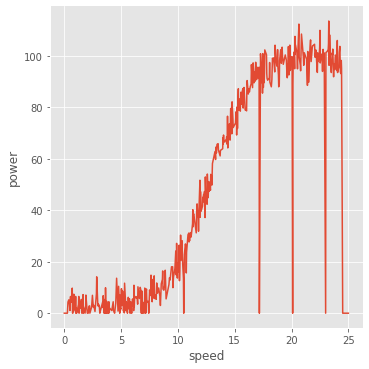

In [46]:
# plot the data
#sns.scatterplot(data=df)
# x = the independent variable, y = dependent variable [] https://www.youtube.com/watch?v=zPG4NjIkCjc
# x value is the input, y value is the output
sns.relplot(x="speed", y="power", kind="line", data=df)

As we are dealing continous, numerical, bivariant data, a more appropriate plot to use is a scatterplot. [1][2]

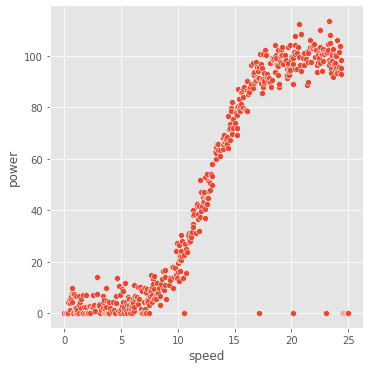

In [47]:
# plot the data
# [] https://www.youtube.com/watch?v=zPG4NjIkCjc
sns.relplot(x="speed", y="power", data=df);

After investigating the dataset we can concluded it contains two values; `Speed`, which refers to wind speed possible measured in knots and `Power`, the power output for the corresponding wind speed. The dataset contains a number of $0$ power values, meaning there are certain wind speeds that do not produce a power output. 

The $0$ power values at the low & high of the wind speed range can be attributed to the wind being too light to move the turbines and too strong to operates the turbine safely. The $0$ power values between the low & high ends of the wind speed range would require further investigation to determine the reasons behind them 

In [48]:
# Lets look at the amount of power > 0
df[df['power'] > 0].shape

(451, 2)

In [49]:
# Lets separate out the rows that have no power output
# [] https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/#:~:text=One%20way%20to%20filter%20by,based%20on%20year's%20value%202002.
noPowerProduction = df[df['power']==0]

In [50]:
noPowerProduction.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [51]:
noPowerProduction.shape

(49, 2)

In [52]:
noSpeed = noPowerProduction['speed']
noPower = noPowerProduction['power']

In [57]:
speed = df['speed']
power = df['power']

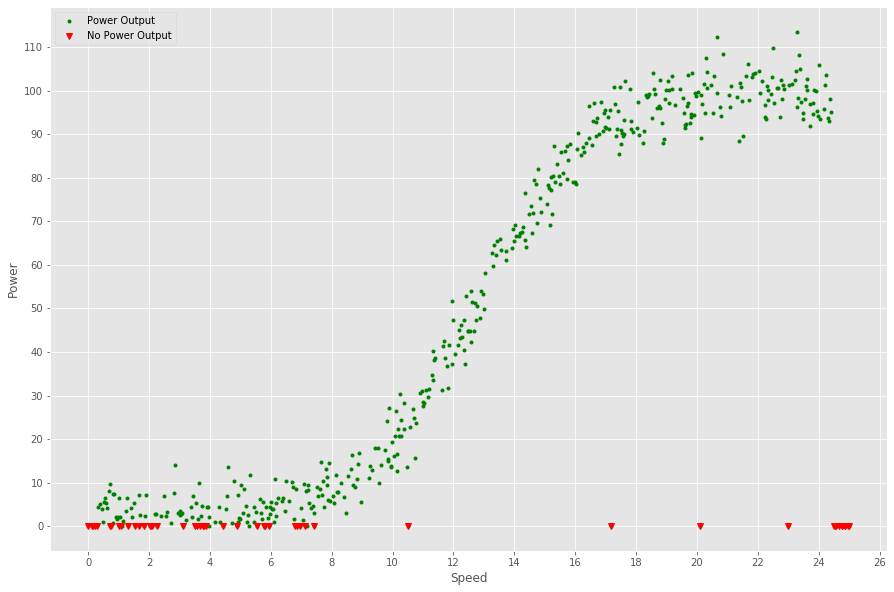

In [58]:
# https://stackoverflow.com/questions/50120633/plotting-line-graph-with-highlighted-data-points/50120670
# https://www.kite.com/python/answers/how-to-change-the-frequency-of-ticks-in-a-matplotlib-figure-in-python
# https://realpython.com/ggplot-python/
# https://matplotlib.org/3.1.1/gallery/style_sheets/ggplot.html
plt.plot(speed, power, 'g.', label = 'Power Output')
plt.plot(noSpeed, noPower, 'rv', label = 'No Power Output')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.xticks(np.arange(0,28,2))
plt.yticks(np.arange(0,120,10))
plt.legend()

### <u>Fitting The Line<u>
    
 We shall try establish the coefficients and intercept and find the best fit line

In [59]:
X = df['speed']
y = df['power']

In [60]:
np.polyfit(X, y,1)

array([  4.91759567, -13.89990263])

In [61]:
np.polyfit(X, y,2)

array([ -0.07021949,   6.67418543, -21.22684391])

In [62]:
m,c = np.polyfit(X, y ,1)

In [63]:
# The coefficients and intercept for the best line are m & c 
m,c 

(4.9175956654046695, -13.899902630519595)

In [64]:
np.polyfit(X, y,2)

array([ -0.07021949,   6.67418543, -21.22684391])

In [65]:
m1,c1, b = np.polyfit(X, y,2)


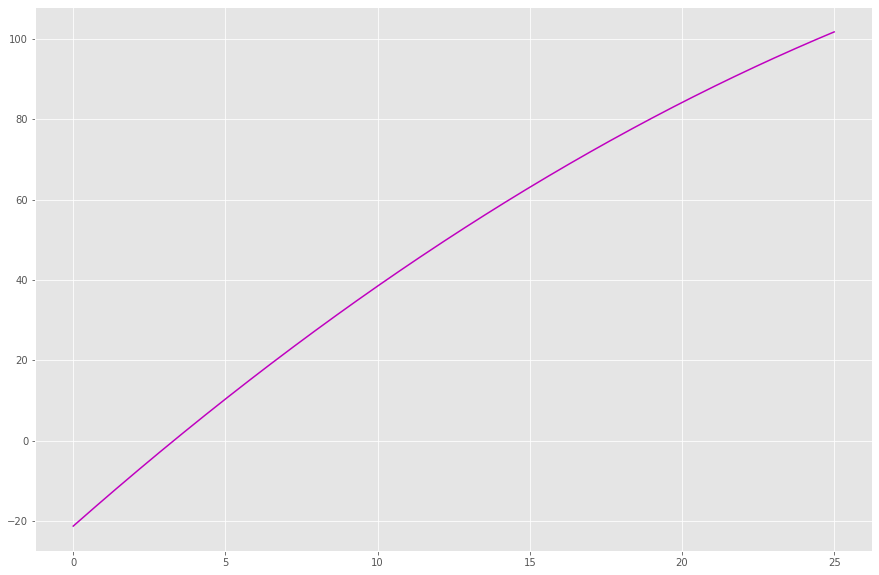

In [67]:
plt.plot(X, m1 * X  * X + c1 * X + b, 'm-', label = '2nd Best Fit Line')

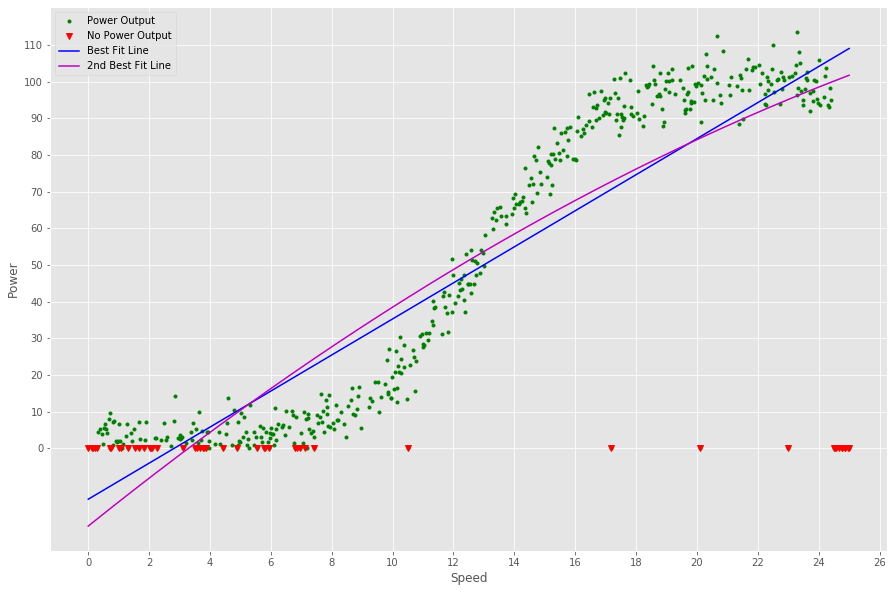

In [68]:
# https://stackoverflow.com/questions/50120633/plotting-line-graph-with-highlighted-data-points/50120670
# https://www.kite.com/python/answers/how-to-change-the-frequency-of-ticks-in-a-matplotlib-figure-in-python
# https://realpython.com/ggplot-python/
# https://matplotlib.org/3.1.1/gallery/style_sheets/ggplot.html
x = plt.plot(Speed, Power, 'g.', label = 'Power Output')
y = plt.plot(noSpeed, noPower, 'rv', label = 'No Power Output')
plt.plot(X,m * X + c, 'b-', label = 'Best Fit Line')
plt.plot(X, m1 * X  * X + c1 * X + b, 'm-', label = '2nd Best Fit Line')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.xticks(np.arange(0,28,2))
plt.yticks(np.arange(0,120,10))
plt.legend()

In [ ]:
np.polyfit(X, y,1)

### Predicting 

use KFold

In [73]:
Speed = df['speed']
Power = df['power']

In [74]:
# https://stackoverflow.com/questions/49514684/python-sklearn-fit-array-error/49517796
# https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.Series.reshape.html
Speed = Speed.values.reshape(-1, 1)

In [75]:
#import sklearn.model_selection as mod
#speed_train, speed_test, power_train, power_test  = mod.train_test_split(Speed, Power, test_size=0.2, random_state = 0)

In [76]:
import sklearn.model_selection as mod
speed_train, speed_test, power_train, power_test  = mod.train_test_split(Speed, Power, test_size=0.33)

In [77]:
# https://scikit-learn.org/stable/modules/linear_model.html
import sklearn.linear_model as lin
reg = lin.LinearRegression()

In [78]:
reg.fit(speed_train, power_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
reg.predict(speed_test)

array([ 50.46522896,  50.82204066,   4.15582726,  -8.82260379,
        83.56308263,  -1.20586328,  73.4439027 ,  71.06515801,
        67.25440901,  83.8009571 ,  49.15691938,  29.63218293,
        93.32545085,  12.48619117, 100.59013715,  10.58319542,
        23.56162647, 104.28194891,  35.82167662,  -9.8930389 ,
       103.44463078,  61.54066425, 100.11438821,  89.27682738,
        24.51312435,  45.34617038,  11.29681883,  54.15704072,
        21.65387322,  16.0590657 ,  53.80022902,  56.5405429 ,
        11.05894436,  46.65447996,  37.24892344,  47.96754703,
        72.25453035,  -0.84905158,  66.77866007,  95.9468275 ,
        23.323752  ,  43.44317462,  25.10781052,  76.77890276,
       101.66057226,  -9.06047826,  17.60524976,  22.12962216,
        99.15813284,  51.2977896 ,  26.89186904,  72.01665588,
       -12.03866662,   4.9883879 ,  21.89174769,  33.6808064 ,
        47.61073532,  72.13559312,  85.2329614 ,  90.47095722,
        12.12937947,  -5.96811016,  68.80059306,  21.77

[] https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

### Evaluate

In [ ]:
reg.predict(speed_test) == power_test

In [ ]:
(reg.predict(speed_test) == power_test).sum()

In [ ]:
print(reg.coef_)
print(reg.intercept_)

In [ ]:
import sklearn.metrics as met
score = met.r2_score
power_pred = reg.predict(speed_test)

In [ ]:
score(power_test, power_pred)

### <u>Polynomial Regression<u>

Polynomial regression is another form of regression analysis in which the relationship between the independent `X` and the dependent `y` is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of `X` and the corresponding conditional mean of `y`, denoted `E(y |x)`. Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function E(y | x) is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.

Linear regression and polynomial regression are essentially the same thing. Polynomial regression is multiple iterations of simple linear regression, a simple linear regression is actually a first order polynomial. The coefficients are all linear  

[] https://en.wikipedia.org/wiki/Polynomial_regression
[] https://www.youtube.com/watch?v=QptI-vDle8Y

### <u>Neural Network<u>

In [ ]:
import sklearn.neural_network as sknn


# Train the neural network.
regr = sknn.MLPRegressor(max_iter=10000).fit(Speed, Power)

# Show the predictions.
np.array([Power, regr.predict(Speed)]).T

In [ ]:
regr.score(Speed, Power)

### Logistic Regression

In [82]:
# https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
#cant use logistic because it is or binary values 
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [84]:
#logisticRegr.fit(speed_train, power_train)

In [ ]:
import sklearn. neighbors as nei

In [ ]:
# create my inputs and outputs
inputs = df[['speed']]
outputs = df[['power']]

In [ ]:
# plot the data
#sns.scatterplot(data=df)
# x = the independent variable, y = dependent variable [] https://www.youtube.com/watch?v=zPG4NjIkCjc
# x value is the input, y value is the output
sns.relplot(x="speed", y="power", data=df)

In [ ]:
plt.plot(df["power"], df["speed"],'k.' )


### Reference

[1] https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots

[2] https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

[3] https://www.youtube.com/watch?v=aq8VU5KLmkY&list=RDCMUC6AVa0vSrCpuskzGDDKz_EQ&start_radio=1&t=0

### ROugh work



In [ ]:
df[df['power'] == 0].shape

In [ ]:
noPower = df['power'] == 0

In [ ]:
noPower.head(5)

In [ ]:
# [] https://seaborn.pydata.org/tutorial/relational.html
sns.relplot(x="speed", y="power", kind="line", data=df)